# Invariant Euler Lagrange equations for three-dimensional framed curves
<br/>

This notebook is dedicated to providing the calculations that go into deriving the invariant Euler Lagrange equations for SE(3) invariant Lagrangians defined over two-dimensional framed curves.  We will rely heavily on the LieSympy module, which was also written by this author.

# Lie Derivatives in Matrix Coordinates

In this notebook, we explore how to express contact forms for a matrix Lie group.  The following is an outline of our work:

**1)  Introduction of coordinates and group action**

**2)  Find the basic contact form in matrix coordinates**

**3)  Compute the infinitesimal generator of the action**

**4)  Compute the Lie derivative of certain contact forms with respect to the infinitesimal generator**

**5)  Compute the pullback of the Lie derivatives**

**6)  Compute the invariant Eulerian operator $\mathcal{A}^*$**

**7)  Determine the structure of the $W$ term in the invariant Euler-Lagrange equations**

We begin this process by importing various python modules and adjustin the printing settings of this notebook.

In [1]:
from sympy import *
from itertools import *
import LieSympy as lp
import numpy as np
init_printing()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Introduction of Coordinates

Let $G_1 = G_2 = SE(2)$.  Take $(a, b, \psi)$ and $(x, u, \varphi)$ to be local coordiantes for $G_1$ and $G_2$ repsectively.  The code below defines the symbols and the standard action of $G1$ on $G2$.

In [2]:
x = symbols('x')
y = Function('y')('x')
u = Function('u')('x')

a = symbols('a')
b = symbols('b')
c = symbols('c')

phi1 = Function('varphi_1')('x')
phi2 = Function('varphi_2')('x')
phi3 = Function('varphi_3')('x')

psi1 = symbols('psi_1')
psi2 = symbols('psi_2')
psi3 = symbols('psi_3')
identity = {a:0, b:0, c:0, psi1:0, psi2:0, psi3:0}

dx = symbols('dx')
dp1 = symbols('d\\varphi_1')
dp2 = symbols('d\\varphi_2')
dp3 = symbols('d\\varphi_3')

# Infinitesimal Generator of the Action

In [3]:
F_U = Matrix([[cos(phi1),-sin(phi1),0],[sin(phi1),cos(phi1),0],[0,0,1]])
F_Y = Matrix([[cos(phi2),0,-sin(phi2)],[0,1,0],[sin(phi2),0,cos(phi2)]])
F_X = Matrix([[1,0,0],[0,cos(phi3),-sin(phi3)],[0,sin(phi3),cos(phi3)]])

F = F_X*F_Y*F_U
F11 = Function('F11')('x')
F12 = Function('F12')('x')
F13 = Function('F13')('x')
F21 = Function('F21')('x')
F22 = Function('F22')('x')
F23 = Function('F23')('x')
F31 = Function('F31')('x')
F32 = Function('F32')('x')
F33 = Function('F33')('x')

dF11 = symbols('dF_11')
dF12 = symbols('dF_12')
dF13 = symbols('dF_13')
dF21 = symbols('dF_21')
dF22 = symbols('dF_22')
dF23 = symbols('dF_23')
dF31 = symbols('dF_31')
dF32 = symbols('dF_32')
dF33 = symbols('dF_33')

B = Matrix([[F11,F12,F13],[F21,F22,F23],[F31,F32,F33]])

T11 = symbols('T11')
T12 = symbols('T12')
T13 = symbols('T13')
T21 = symbols('T21')
T22 = symbols('T22')
T23 = symbols('T23')
T31 = symbols('T31')
T32 = symbols('T32')
T33 = symbols('T33')

T = Matrix([[T11,T12,T13],[T21,T22,T23],[T31,T32,T33]])

R_U = Matrix([[cos(psi1),-sin(psi1),0],[sin(psi1),cos(psi1),0],[0,0,1]])
R_Y = Matrix([[cos(psi2),0,-sin(psi2)],[0,1,0],[sin(psi2),0,cos(psi2)]])
R_X = Matrix([[1,0,0],[0,cos(psi3),-sin(psi3)],[0,sin(psi3),cos(psi3)]])

R = R_X*R_Y*R_U
z = Matrix([x,y,u])
v = Matrix([a,b,c])

X = simplify((R*z+v).row(0)[0])
Y = simplify((R*z+v).row(1)[0])
U = simplify((R*z+v).row(2)[0])
B_new = R*B

# Define quantities for prolongation
A = [['x'],['y','u','F11','F12','F13','F21','F22','F23','F31','F32','F33']]
n = 1

# Dictionaries for substitutions
differentials = {diff(F11,x):dF11, diff(F12,x):dF12, diff(F13,x):dF13,
                 diff(F21,x):dF21, diff(F22,x):dF22, diff(F23,x):dF23,
                 diff(F31,x):dF31, diff(F32,x):dF32, diff(F33,x):dF33}

S = {y:symbols('y'), u:symbols('u'), diff(y,x):symbols('y_x'), diff(u,x):symbols('u_x'),
           F11:symbols('F_11'), F12:symbols('F_12'), F13:symbols('F_13'),
           F21:symbols('F_21'), F22:symbols('F_22'), F23:symbols('F_23'),
           F31:symbols('F_31'), F32:symbols('F_32'), F33:symbols('F_33'),
           diff(F11,x):symbols('F_11x'), diff(F12,x):symbols('F_12x'), diff(F13,x):symbols('F_13x'),
           diff(F21,x):symbols('F_21x'), diff(F22,x):symbols('F_22x'), diff(F23,x):symbols('F_23x'),
           diff(F31,x):symbols('F_31x'), diff(F32,x):symbols('F_32x'), diff(F33,x):symbols('F_33x')}

invariantize = {T11:symbols('F11'),T12:symbols('F21'),T13:symbols('F31'), T21:symbols('F12'),T22:symbols('F22'),T23:symbols('F32'), T31:symbols('F13'),T32:symbols('F23'),T33:symbols('F33')}

# $v_1$, $v_2$, $v_3$

In [4]:
v1 = [diff(X,a).subs(identity), diff(Y,a).subs(identity), diff(U,a).subs(identity)]+ flatten(diff(B_new,a).subs(identity))
v1

In [5]:
v2 = [diff(X,b).subs(identity), diff(Y,b).subs(identity), diff(U,b).subs(identity)]+ flatten(diff(B_new,b).subs(identity))
v2

In [6]:
v3 = [diff(X,c).subs(identity), diff(Y,c).subs(identity), diff(U,c).subs(identity)]+ flatten(diff(B_new,c).subs(identity))
v3

# $v_4$

In [7]:
v4 = [diff(X,psi1).subs(identity), diff(Y,psi1).subs(identity), diff(U,psi1).subs(identity)]+ flatten(diff(B_new,psi1).subs(identity))
v4

In [8]:
pr1_v4 = [v.subs(S) for v in lp.Prolong(A, v4, n)]
pr1_v4

# $v_5$

In [9]:
v5 = [diff(X,psi2).subs(identity), diff(Y,psi2).subs(identity), diff(U,psi2).subs(identity)]+ flatten(diff(B_new,psi2).subs(identity))
v5

In [10]:
pr1_v5 = [v.subs(S) for v in lp.Prolong(A, v5, n)]
pr1_v5

# $v_6$

In [11]:
v6 = [diff(X,psi3).subs(identity), diff(Y,psi3).subs(identity), diff(U,psi3).subs(identity)]+ flatten(diff(B_new,psi3).subs(identity))
v6

In [12]:
pr1_v6 = [v.subs(S) for v in lp.Prolong(A, v6, n)]
pr1_v6

# Basic Contact forms
The contact forms for the frame portion of our moving frame are given by the linearly independententries of $$dg\, g^{-1}-g_xg^{-1}dx$$

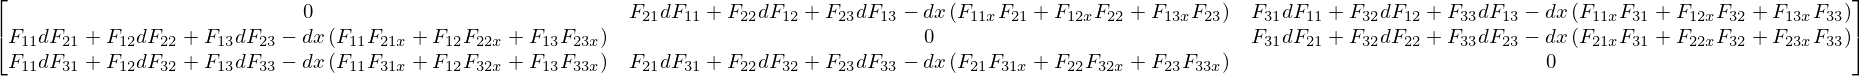

In [13]:
temp = (diff(B,x)*B.transpose()).subs(differentials).subs(S) -(diff(B,x)*B.transpose()).subs(S)*dx
temp2 = Matrix([[0,temp[0,1],temp[0,2]],[temp[1,0],0,temp[1,2]],[temp[2,0],temp[2,1], 0]])
temp2

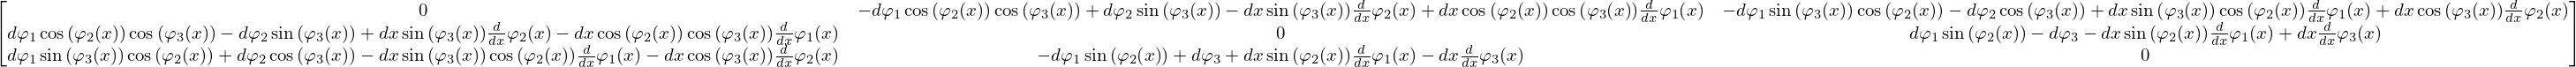

In [14]:
temp = (diff(F,x)*F.transpose()).subs({diff(phi1,x):dp1, diff(phi2,x):dp2, diff(phi3,x):dp3}).subs(S) -(diff(F,x)*F.transpose()).subs(S)*dx
temp2 = Matrix([[0,temp[0,1],temp[0,2]],[temp[1,0],0,temp[1,2]],[temp[2,0],temp[2,1], 0]])
simplify(temp2)

# Lie Derivatives in General Matrix Coordinates

In [15]:
w1_lower = [-(symbols('F11')*symbols('F21_x')+symbols('F12')*symbols('F22_x')+symbols('F13')*symbols('F23_x')), 0, 0, 0, 0, 0, symbols('F11'), symbols('F12'), symbols('F13'), 0, 0, 0]
w1_upper = [-(symbols('F21')*symbols('F11_x')+symbols('F22')*symbols('F12_x')+symbols('F23')*symbols('F13_x')), 0, 0, symbols('F21'), symbols('F22'), symbols('F23'), 0, 0, 0, 0, 0, 0]

w2_lower = [-(symbols('F11')*symbols('F31_x')+symbols('F12')*symbols('F32_x')+symbols('F13')*symbols('F33_x')), 0, 0, 0, 0, 0, 0, 0, 0, symbols('F11'), symbols('F12'), symbols('F13')]
w2_upper = [-(symbols('F31')*symbols('F11_x')+symbols('F32')*symbols('F12_x')+symbols('F33')*symbols('F13_x')),0, 0, symbols('F31'), symbols('F32'), symbols('F33'), 0, 0, 0, 0, 0, 0]

w3_lower = [-(symbols('F21')*symbols('F31_x')+symbols('F22')*symbols('F32_x')+symbols('F23')*symbols('F33_x')), 0, 0, 0, 0, 0, symbols('F31'), symbols('F32'), symbols('F33'), 0, 0, 0]
w3_upper = [-(symbols('F11')*symbols('F31_x')+symbols('F12')*symbols('F32_x')+symbols('F13')*symbols('F33_x')), 0, 0, 0, 0, 0, 0, 0, 0, symbols('F21'), symbols('F22'), symbols('F23')]


w1 = [0.5*(a-b) for a,b in zip(w1_lower,w1_upper)]
w2 = [0.5*(a-b) for a,b in zip(w2_lower,w2_upper)]
w3 = [0.5*(a-b) for a,b in zip(w3_lower,w3_upper)]

# $w_1$

In [16]:
lp.Lie_derivative(A, n, pr1_v4, w1_lower)

In [17]:
lp.Lie_derivative(A, n, pr1_v5, w1_lower)

In [18]:
lp.Lie_derivative(A, n, pr1_v6, w1_lower)

In [19]:
lp.Lie_derivative(A, n, pr1_v4, w1_upper)

In [20]:
lp.Lie_derivative(A, n, pr1_v5, w1_upper)

In [21]:
lp.Lie_derivative(A, n, pr1_v6, w1_upper)

# $w_2$

In [22]:
lp.Lie_derivative(A, n, pr1_v4, w2_lower)

In [23]:
lp.Lie_derivative(A, n, pr1_v5, w2_lower)

In [24]:
lp.Lie_derivative(A, n, pr1_v6, w2_lower)

In [25]:
lp.Lie_derivative(A, n, pr1_v4, w2_upper)

In [26]:
lp.Lie_derivative(A, n, pr1_v5, w2_upper)

In [27]:
lp.Lie_derivative(A, n, pr1_v6, w2_upper)

# $w_3$

In [28]:
lp.Lie_derivative(A, n, pr1_v4, w3_lower)

In [29]:
lp.Lie_derivative(A, n, pr1_v5, w3_lower)

In [30]:
lp.Lie_derivative(A, n, pr1_v6, w3_lower)

In [31]:
lp.Lie_derivative(A, n, pr1_v4, w3_upper)

In [32]:
lp.Lie_derivative(A, n, pr1_v5, w3_upper)

In [33]:
lp.Lie_derivative(A, n, pr1_v6, w3_upper)

# Create Dictionary to Compute the Pullback of the Basic Contact Form

In [34]:
def pb_contact_form(i,j):
    return diff(F[i-1,j-1],phi1)*symbols('\\theta^{\\varphi_1}') + diff(F[i-1,j-1],phi2)*symbols('\\theta^{\\varphi_2}') + diff(F[i-1,j-1],phi3)*symbols('\\theta^{\\varphi_3}')

fun_to_sym_angle = {phi1: symbols('\\varphi_1'), phi2: symbols('\\varphi_2'), phi3: symbols('\\varphi_3'),
                   diff(phi1,x): symbols('\\varphi_{1x}'), diff(phi2,x): symbols('\\varphi_{2x}'), diff(phi3,x): symbols('\\varphi_{3x}')}

temp3 = diff(F,x).subs(fun_to_sym_angle)

pullback = {symbols('theta^F11', commutative=False):pb_contact_form(1,1),
            symbols('theta^F12', commutative=False):pb_contact_form(1,2),
            symbols('theta^F13', commutative=False):pb_contact_form(1,3),
            symbols('theta^F21', commutative=False):pb_contact_form(2,1),
            symbols('theta^F22', commutative=False):pb_contact_form(2,2),
            symbols('theta^F23', commutative=False):pb_contact_form(2,3),
            symbols('theta^F31', commutative=False):pb_contact_form(3,1),
            symbols('theta^F32', commutative=False):pb_contact_form(3,2),
            symbols('theta^F33', commutative=False):pb_contact_form(3,3),
            symbols('F_11'): F[0,0], symbols('F_12'): F[0,1], symbols('F_13'): F[0,2],
            symbols('F_21'): F[1,0], symbols('F_22'): F[1,1], symbols('F_23'): F[1,2],
            symbols('F_31'): F[2,0], symbols('F_32'): F[2,1], symbols('F_33'): F[2,2],
            symbols('F11'): F[0,0], symbols('F12'): F[0,1], symbols('F13'): F[0,2],
            symbols('F21'): F[1,0], symbols('F22'): F[1,1], symbols('F23'): F[1,2],
            symbols('F31'): F[2,0], symbols('F32'): F[2,1], symbols('F33'): F[2,2],
            symbols('F11_x'): temp3[0,0], symbols('F12_x'): temp3[0,1], symbols('F13_x'): temp3[0,2],
            symbols('F21_x'): temp3[1,0], symbols('F22_x'): temp3[1,1], symbols('F23_x'): temp3[1,2],
            symbols('F31_x'): temp3[2,0], symbols('F32_x'): temp3[2,1], symbols('F33_x'): temp3[2,2]}

# $w_1$

In [35]:
q1_4_lower = simplify(lp.Lie_derivative(A, n, pr1_v4,w1_lower).xreplace(pullback).subs(fun_to_sym_angle))
q1_5_lower = simplify(lp.Lie_derivative(A, n, pr1_v5,w1_lower).xreplace(pullback).subs(fun_to_sym_angle))
q1_6_lower = simplify(lp.Lie_derivative(A, n, pr1_v6,w1_lower).xreplace(pullback).subs(fun_to_sym_angle))
q1_4_upper = simplify(lp.Lie_derivative(A, n, pr1_v4,w1_upper).xreplace(pullback).subs(fun_to_sym_angle))
q1_5_upper = simplify(lp.Lie_derivative(A, n, pr1_v5,w1_upper).xreplace(pullback).subs(fun_to_sym_angle))
q1_6_upper = simplify(lp.Lie_derivative(A, n, pr1_v6,w1_upper).xreplace(pullback).subs(fun_to_sym_angle))

In [36]:
q1_4_lower

In [37]:
q1_5_lower

In [38]:
q1_6_lower

# $w_2$

In [39]:
q2_4_lower = simplify(lp.Lie_derivative(A, n, pr1_v4,w2_lower).xreplace(pullback).subs(fun_to_sym_angle))
q2_5_lower = simplify(lp.Lie_derivative(A, n, pr1_v5,w2_lower).xreplace(pullback).subs(fun_to_sym_angle))
q2_6_lower = simplify(lp.Lie_derivative(A, n, pr1_v6,w2_lower).xreplace(pullback).subs(fun_to_sym_angle))
q2_4_upper = simplify(lp.Lie_derivative(A, n, pr1_v4,w2_upper).xreplace(pullback).subs(fun_to_sym_angle))
q2_5_upper = simplify(lp.Lie_derivative(A, n, pr1_v5,w2_upper).xreplace(pullback).subs(fun_to_sym_angle))
q2_6_upper = simplify(lp.Lie_derivative(A, n, pr1_v6,w2_upper).xreplace(pullback).subs(fun_to_sym_angle))

In [40]:
q2_4_lower

In [41]:
q2_5_lower

In [42]:
q2_6_lower

# $w_3$

In [43]:
q3_4_lower = simplify(lp.Lie_derivative(A, n, pr1_v4,w3_lower).xreplace(pullback).subs(fun_to_sym_angle))
q3_5_lower = simplify(lp.Lie_derivative(A, n, pr1_v5,w3_lower).xreplace(pullback).subs(fun_to_sym_angle))
q3_6_lower = simplify(lp.Lie_derivative(A, n, pr1_v6,w3_lower).xreplace(pullback).subs(fun_to_sym_angle))
q3_4_upper = simplify(lp.Lie_derivative(A, n, pr1_v4,w3_upper).xreplace(pullback).subs(fun_to_sym_angle))
q3_5_upper = simplify(lp.Lie_derivative(A, n, pr1_v5,w3_upper).xreplace(pullback).subs(fun_to_sym_angle))
q3_6_upper = simplify(lp.Lie_derivative(A, n, pr1_v6,w3_upper).xreplace(pullback).subs(fun_to_sym_angle))

In [44]:
q3_4_lower

In [45]:
q3_5_lower

In [46]:
q3_6_lower

# Pullback of $w_i$

In [47]:
w1_angle_lower = simplify(F11.subs(S).subs(pullback)*pb_contact_form(2,1) + F12.subs(S).subs(pullback)*pb_contact_form(2,2) + F13.subs(S).subs(pullback)*pb_contact_form(2,3))
w1_angle_upper = simplify(F21.subs(S).subs(pullback)*pb_contact_form(1,1) + F22.subs(S).subs(pullback)*pb_contact_form(1,2) + F23.subs(S).subs(pullback)*pb_contact_form(1,3))
w2_angle_lower = simplify(F11.subs(S).subs(pullback)*pb_contact_form(3,1) + F12.subs(S).subs(pullback)*pb_contact_form(3,2) + F13.subs(S).subs(pullback)*pb_contact_form(3,3))
w2_angle_upper = simplify(F31.subs(S).subs(pullback)*pb_contact_form(1,1) + F32.subs(S).subs(pullback)*pb_contact_form(1,2) + F33.subs(S).subs(pullback)*pb_contact_form(1,3))
w3_angle_lower = simplify(F21.subs(S).subs(pullback)*pb_contact_form(3,1) + F22.subs(S).subs(pullback)*pb_contact_form(3,2) + F23.subs(S).subs(pullback)*pb_contact_form(3,3))
w3_angle_upper = simplify(F31.subs(S).subs(pullback)*pb_contact_form(2,1) + F32.subs(S).subs(pullback)*pb_contact_form(2,2) + F33.subs(S).subs(pullback)*pb_contact_form(2,3))

In [48]:
S1 = {symbols('theta^y',commutative=False):0, symbols('theta^u',commutative=False):0, symbols('\\theta^{\\varphi_1}'):1, symbols('\\theta^{\\varphi_2}'):0, symbols('\\theta^{\\varphi_3}'):0}
S2 = {symbols('theta^y',commutative=False):0, symbols('theta^u',commutative=False):0, symbols('\\theta^{\\varphi_1}'):0, symbols('\\theta^{\\varphi_2}'):1, symbols('\\theta^{\\varphi_3}'):0}
S3 = {symbols('theta^y',commutative=False):0, symbols('theta^u',commutative=False):0, symbols('\\theta^{\\varphi_1}'):0, symbols('\\theta^{\\varphi_2}'):0, symbols('\\theta^{\\varphi_3}'):1}

def pullback_vect_rep_1(w):
    return [w.subs(S1), w.subs(S2), w.subs(S3)]

M_lower = simplify(Matrix([pullback_vect_rep_1(w1_angle_lower), pullback_vect_rep_1(w2_angle_upper), pullback_vect_rep_1(w3_angle_lower)])).transpose()
M_upper = simplify(Matrix([pullback_vect_rep_1(w1_angle_upper), pullback_vect_rep_1(w2_angle_upper), pullback_vect_rep_1(w3_angle_upper)])).transpose()

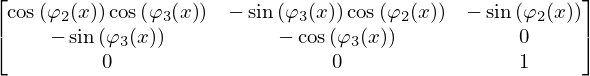

In [49]:
M_lower

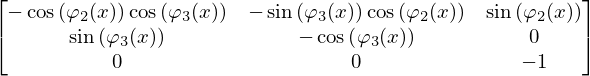

In [50]:
M_upper

# Lie Derivatives of $w_1$

lower

In [51]:
simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q1_4_lower))).transpose()

In [52]:
simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q1_5_lower))).transpose()

In [53]:
simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q1_6_lower))).transpose()

upper

In [54]:
simplify(M_upper.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q1_4_upper))).transpose()

In [55]:
simplify(M_upper.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q1_5_upper))).transpose()

In [56]:
simplify(M_upper.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q1_6_upper))).transpose()

# Lie Derivatives of $w_2$

lower

In [57]:
simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q2_4_lower))).transpose()

In [58]:
simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q2_5_lower))).transpose()

In [59]:
simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q2_6_lower))).transpose()

upper

In [60]:
simplify(M_upper.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q2_4_upper))).transpose()

In [61]:
simplify(M_upper.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q2_5_upper))).transpose()

In [62]:
simplify(M_upper.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q2_6_upper))).transpose()

# Lie Derivatives of $w_3$

lower

In [63]:
simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q3_4_lower))).transpose()

In [64]:
simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q3_5_lower))).transpose()

In [65]:
simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q3_6_lower))).transpose()

upper

In [66]:
simplify(M_upper.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q3_4_upper))).transpose()

In [67]:
simplify(M_upper.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q3_5_upper))).transpose()

In [68]:
simplify(M_upper.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(q3_6_upper))).transpose()

# Summary of the Lie Derivatives of Contact Forms

The Lie Derivatives of $w_1$, $w_2$, and $w_3$ with respect to $v_1$, $v_2$, and $v_3$ are:
\begin{align*}
	&v_4(\theta^{1}_0) = (F_{11}F_{21,x}+F_{12}F_{22,x}+F_{13}F_{23,x})\theta^y_0\\
	&v_5(\theta^{1}_0) = (F_{11}F_{21,x}+F_{12}F_{22,x}+F_{13}F_{23,x})\theta^u_0 + \theta^{3}_0\\
	&v_6(\theta^{1}_0) = 0\\ \\
	&v_4(\theta^{2}_0) = (F_{11}F_{31,x}+F_{12}F_{32,x}+F_{13}F_{33,x})\theta^y_0-\theta^3_0\\
	&v_5(\theta^{2}_0) = (F_{11}F_{31,x}+F_{12}F_{32,x}+F_{13}F_{33,x})\theta^u_0\\
	&v_6(\theta^{2}_0) = 0\\ \\
	&v_4(\theta^{3}_0) = (F_{21}F_{31,x}+F_{22}F_{32,x}+F_{23}F_{33,x})\theta^y_0\\
	&v_5(\theta^{3}_0) = (F_{21}F_{31,x}+F_{22}F_{32,x}+F_{23}F_{33,x})\theta^u_0 + \theta^1_0\\
	&v_6(\theta^{3}_0) = 0
\end{align*}

# Invariant Vertical Derivatives of Curvature Invariants

In [69]:
S = lp.make_S(A, 1)

ky = symbols('kappa^y')
ku = symbols('kappa^u')
k21 = symbols('kappa^21')
k31 = symbols('kappa^31')
k32 = symbols('kappa^32')
Ds = symbols('\\mathcal{D}_s')

invariant_sub = {symbols('y_x'):ky, symbols('u_x'):ku, symbols('F11_x'):0, symbols('F22_x'):0, symbols('F33_x'):0, 
                 symbols('F21_x'):k21, symbols('F12_x'):-k21, symbols('F31_x'):k31, symbols('F13_x'):-k31, symbols('F32_x'):k32, symbols('F23_x'):-k32}
contact_reduction = {symbols('vartheta^y_1'):(Ds+ky*k21)*symbols('vartheta^y_0',commutative=False) + (ky*k31-k32)*symbols('vartheta^u_0',commutative=False),
                    symbols('vartheta^u_1'):(k32-k21*ku)*symbols('vartheta^y_0',commutative=False) + (Ds+ku*k21)*symbols('vartheta^u_0',commutative=False),
                    symbols('vartheta^1_1'):(k21)**2*symbols('vartheta^y_0',commutative=False) + (k21*k31)*symbols('vartheta^u_0',commutative=False) + Ds*symbols('vartheta^1_0',commutative=False) + k31*symbols('vartheta^3_0',commutative=False),
                    symbols('vartheta^2_1'):k21*k31*symbols('vartheta^y_0',commutative=False) + (k31)**2*symbols('vartheta^u_0',commutative=False) + Ds*symbols('vartheta^2_0',commutative=False) - k31*symbols('vartheta^3_0',commutative=False),
                    symbols('vartheta^3_1'):k21*k32*symbols('vartheta^y_0',commutative=False) + k31*k32*symbols('vartheta^u_0',commutative=False) + k31*symbols('vartheta^1_0',commutative=False) + Ds*symbols('vartheta^3_0',commutative=False)}

In [70]:
def test_apply_vect(B, S, v, f):
    A = B[0]

    n = max([ode_order(f, Function(var)) for var in A[1]])
    f = f.subs(S[5])
    var = lp.fullJet(A[0], A[1], n)
    vect = lp.Prolong(A, v, n)
    g = 0
    for i in range(len(vect)):
        g = g + diff(f, S[0][var[i]])*vect[i]
    return g.subs(S[5])

# $d_{\mathcal{V}} \kappa^y$

In [71]:
dvky = symbols('vartheta^y_1') - test_apply_vect([A,1], S, v4, diff(y,x))*symbols('vartheta^1_0',commutative=False) - test_apply_vect([A,1], S, v5, diff(y,x))*symbols('vartheta^2_0',commutative=False) - test_apply_vect([A,1], S, v6, diff(y,x)) *symbols('vartheta^3_0',commutative=False)
dvky

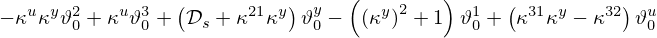

In [72]:
dvky = simplify(dvky.subs(invariant_sub).subs(contact_reduction))
dvky

# $d_{\mathcal{V}} \kappa^u$

In [73]:
dvku = symbols('vartheta^u_1') - test_apply_vect([A,1], S, v4, diff(u,x))*symbols('vartheta^1_0',commutative=False) - test_apply_vect([A,1], S, v5, diff(u,x))*symbols('vartheta^2_0',commutative=False) -test_apply_vect([A,1], S, v6, diff(u,x)) *symbols('vartheta^3_0',commutative=False)
dvku

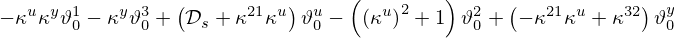

In [74]:
dvku = simplify(dvku.subs(invariant_sub).subs(contact_reduction))
dvku

# $d_{\mathcal{V}} \kappa^{21}$

In [75]:
dvk21 = symbols('vartheta^1_1') - test_apply_vect([A,1], S, v4, diff(F21,x))*symbols('vartheta^1_0',commutative=False) - test_apply_vect([A,1], S, v5, diff(F21,x))*symbols('vartheta^2_0',commutative=False) -test_apply_vect([A,1], S, v6, diff(F21,x)) *symbols('vartheta^3_0',commutative=False)
dvk21

In [76]:
dvk21 = simplify(dvk21.subs(invariant_sub).subs(contact_reduction))
dvk21

# $d_{\mathcal{V}} \kappa^{31}$

In [77]:
dvk31 = symbols('vartheta^2_1') - test_apply_vect([A,1], S, v4, diff(F31,x))*symbols('vartheta^1_0',commutative=False) - test_apply_vect([A,1], S, v5, diff(F31,x))*symbols('vartheta^2_0',commutative=False) -test_apply_vect([A,1], S, v6, diff(F31,x)) *symbols('vartheta^3_0',commutative=False)
dvk31

In [78]:
dvk31 = simplify(dvk31.subs(invariant_sub).subs(contact_reduction))
dvk31

# $d_{\mathcal{V}} \kappa^{32}$

In [79]:
dvk32 = symbols('vartheta^3_1') - test_apply_vect([A,1], S, v4, diff(F32,x))*symbols('vartheta^1_0',commutative=False) - test_apply_vect([A,1], S, v5, diff(F32,x))*symbols('vartheta^2_0',commutative=False) -test_apply_vect([A,1], S, v6, diff(F32,x)) *symbols('vartheta^3_0',commutative=False)
dvk32

In [80]:
dvk32 = simplify(dvk32.subs(invariant_sub).subs(contact_reduction))
dvk32

# Eulerian operator $\mathcal{A}^*$

In [81]:
contact_symbols = [symbols('vartheta^y_0',commutative=False) ,symbols('vartheta^u_0',commutative=False), symbols('vartheta^1_0',commutative=False), symbols('vartheta^2_0',commutative=False), symbols('vartheta^3_0',commutative=False)] 
contact_zeros = {symbols('vartheta^y_0',commutative=False):0,symbols('vartheta^u_0',commutative=False):0,symbols('vartheta^1_0',commutative=False):0, symbols('vartheta^2_0',commutative=False):0,symbols('vartheta^3_0',commutative=False):0}
dvk = [dvky, dvku, dvk21, dvk31, dvk32]

## $\mathcal{A}$

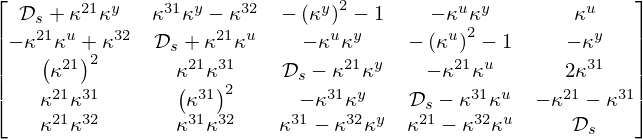

In [82]:
temp = []
for j in range(5):
    temp.append([dvk[j].subs({contact_symbols[i]:1}).subs(contact_zeros) for i in range(len(contact_symbols))])
Matrix(temp)

## $\mathcal{A}^*$

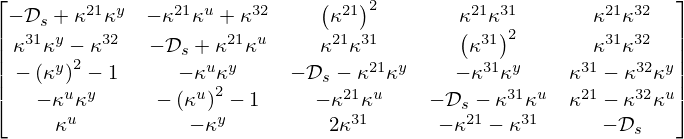

In [83]:
temp = []
for j in range(5):
    temp.append([dvk[j].subs({contact_symbols[i]:1}).subs(contact_zeros).subs({Ds: - Ds}) for i in range(len(contact_symbols))])
mc_A = Matrix(temp).transpose()
mc_A

# Determine W

In [84]:
X = (T*z)[0] + a 
Y = (T*z)[1] + b
U = (T*z)[2] + b
B_new = T*B

Y_x = diff(Y,x)/diff(X,x)
U_x = diff(U,x)/diff(X,x)
Y_xx = diff(Y_x,x)/diff(X,x)
U_xx = diff(U_x,x)/diff(X,x)
Bx_new = T*diff(B,x)/diff(X,x)

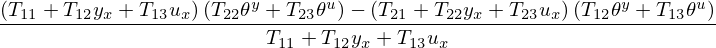

In [85]:
simplify(lp.inv_contact(A, 1, X, Y, Y_x))

In [86]:
def pullback_vect_rep(A, w):
    temp = []
    contact_syms = lp.Contact_sym_plain_nc(A,1)[1:]
    for i in range(len(A[1])):
        temp.append(simplify(w.subs({contact_syms[i]:1}).subs(dict((p,0) for p in contact_syms))))
    return temp

def inv_contact_simple(A, X, f, fx):
    temp = simplify(lp.inv_contact(A, 1, X, f, fx).subs(invariantize))
    return sum([(a)*b for a,b in zip(pullback_vect_rep(A, temp), lp.Contact_sym_plain_nc(A,1)[1:])])

# $\vartheta^y_0$

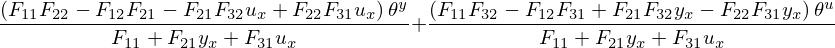

In [87]:
var_y = inv_contact_simple(A, X, Y, Y_x)
var_y

# $\vartheta^u_0$

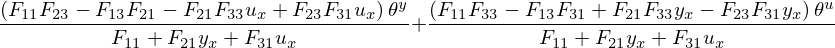

In [88]:
var_u = inv_contact_simple(A, X, U, U_x)
var_u

# $\vartheta^1_0$

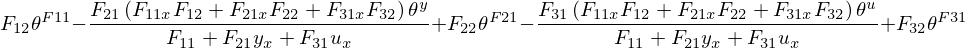

In [89]:
var_1 = inv_contact_simple(A, X, B_new[1,0], Bx_new[1,0])
var_1

In [90]:
temp = var_1.subs({symbols('theta^y',commutative=False):0, symbols('theta^u',commutative=False):0})
temp

In [91]:
simplify(temp.subs(pullback))

In [92]:
var_1_list = list(simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(simplify(temp.xreplace(pullback).subs(fun_to_sym_angle))))).transpose())
var_1_list

# $\vartheta^2_0$

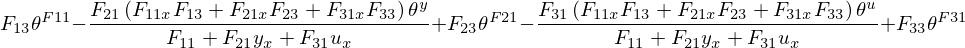

In [93]:
var_2 = inv_contact_simple(A, X, B_new[2,0], Bx_new[2,0])
var_2

In [94]:
temp = var_2.subs({symbols('theta^y',commutative=False):0, symbols('theta^u',commutative=False):0})
temp

In [95]:
simplify(temp.subs(pullback))

In [96]:
var_2_list = list(simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(simplify(temp.xreplace(pullback).subs(fun_to_sym_angle))))).transpose())
var_2_list

# $\vartheta^3_0$

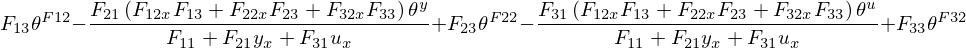

In [97]:
var_3 = inv_contact_simple(A, X, B_new[2,1], Bx_new[2,1])
var_3

In [98]:
temp = var_3.subs({symbols('theta^y',commutative=False):0, symbols('theta^u',commutative=False):0})
temp

In [99]:
var_3_list = list(simplify(M_lower.subs(fun_to_sym_angle).inv()*Matrix(pullback_vect_rep_1(simplify(temp.xreplace(pullback).subs(fun_to_sym_angle))))).transpose())
var_3_list

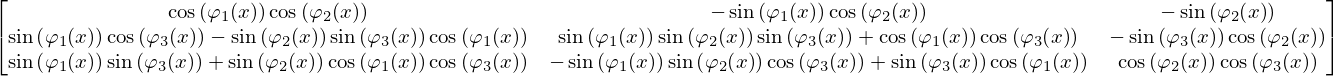

In [100]:
F

From the expressions above, we see that the lower right $3\times 3$ block of $W$ is given by:
$$(F_{11} + F_{21} y_{x} + F_{31} u_{x})\begin{pmatrix}F_{33} & -F_{32} & F_{31}\\
	F_{23} & -F_{22} & F_{21}\\
	F_{13} & -F_{12} & F_{11}
\end{pmatrix} $$

# Determinant of $W$

The determinant of the upper right portions is derived below:

In [101]:
expand(simplify(simplify((symbols('F11') + symbols('F21')*symbols('y_x') + symbols('F31')* symbols('u_x'))*Matrix([[var_y.subs({symbols('theta^y', commutative=False):1,symbols('theta^u', commutative=False):0}),var_u.subs({symbols('theta^y', commutative=False):1,symbols('theta^u', commutative=False):0})],
        [var_y.subs({symbols('theta^y', commutative=False):0,symbols('theta^u', commutative=False):1}),var_u.subs({symbols('theta^y', commutative=False):0,symbols('theta^u', commutative=False):1})]])).det()))

In [102]:
det_relation = det(B).subs({F11:symbols('F11'), F12:symbols('F12'), F13:symbols('F13'),
           F21:symbols('F21'), F22:symbols('F22'), F23:symbols('F23'),
           F31:symbols('F31'), F32:symbols('F32'), F33:symbols('F33'),})

In [103]:
det_relation

In [104]:
simplify(expand(simplify(simplify((symbols('F11') + symbols('F21')*symbols('y_x') + symbols('F31')* symbols('u_x'))*Matrix([[var_y.subs({symbols('theta^y', commutative=False):1,symbols('theta^u', commutative=False):0}),var_u.subs({symbols('theta^y', commutative=False):1,symbols('theta^u', commutative=False):0})],
        [var_y.subs({symbols('theta^y', commutative=False):0,symbols('theta^u', commutative=False):1}),var_u.subs({symbols('theta^y', commutative=False):0,symbols('theta^u', commutative=False):1})]])).det()))/det_relation)

Using this information, we find that the determinant of $W$ is given by

$$-(F_{11}+F_{21}y_x+F_{31}u_x)^3.$$